### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [ ]:
class sklearn.cluster.KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=1,
    algorithm='auto'
)

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# 붓꽃 데이터 로드하기
iris = 
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
iris_df = 
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
#붓꽃 데이터 세트를 3개 그룹으로 군집화하는 Kmeans 개체 생성 및 학습/군집화 수행
# 1. 3개의 그룹으로 군집화하는 K-Means 객체 생성
kmeans = 
# 2. 붓꽃 데이터에 대해 군집화 학습(수행)


KMeans(n_clusters=3, random_state=11)

In [ ]:
# 실제 분류값인 target과 군집화 분류값인 labels_(cluster)를 이용하여 비교 확인
iris_df['target'] = iris.target
iris_df['cluster']= 

print(iris_result)

target  cluster
0       0          50
1       1          47
        2           3
2       1          14
        2          36
Name: sepal_length, dtype: int64


sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      0                  50           50            50           50
1      1                  48           48            48           48
       2                   2            2             2            2
2      1                  14           14            14           14
       2                  36           36            36           36

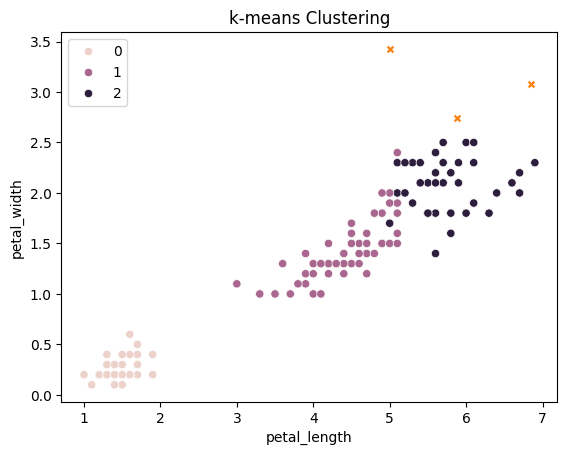

In [ ]:
# 군집화 결과 시각화
import seaborn as sns 


plt.show()

In [ ]:
# PCA 를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X 좌표, Y 좌표로 개별 데이터를 표현
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

# 데이터프레임에 두 속성 추가
iris_df['pca_x'] = 
iris_df['pca_y'] = 
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949


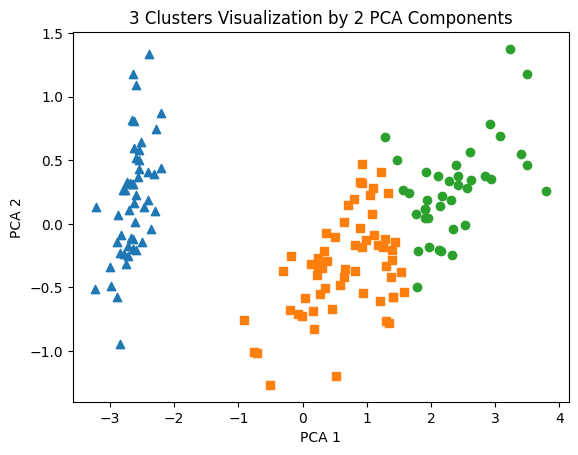

In [ ]:
# PCA로 차원 축소된 데이터를 시각화 (산점도)


In [ ]:
#실루엣 분석

In [23]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42).fit(iris_df)

iris_df['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
iris_df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, iris_df['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

iris_df.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [ ]:
#군집별 평균 실루엣 계수 값으로 확인


cluster
0    0.436842
1    0.797604
2    0.422323
Name: silhouette_coeff, dtype: float64

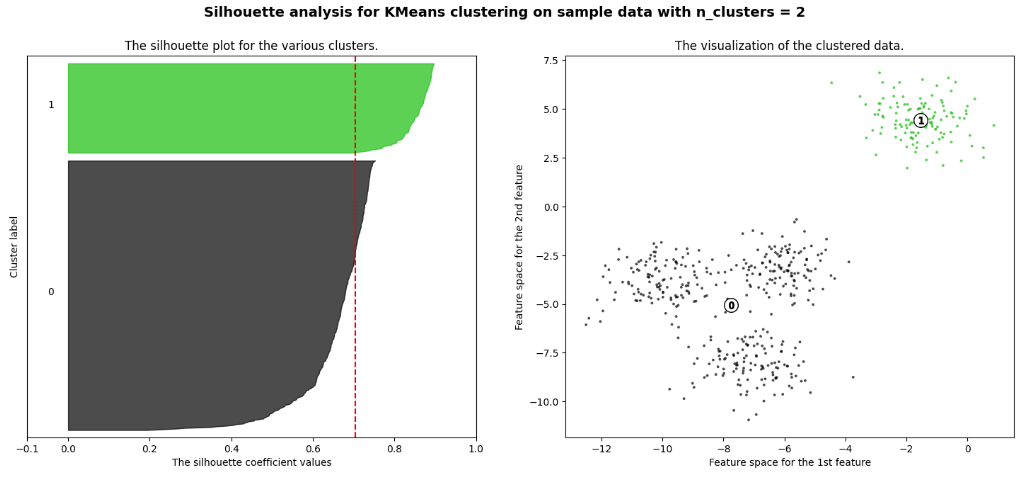

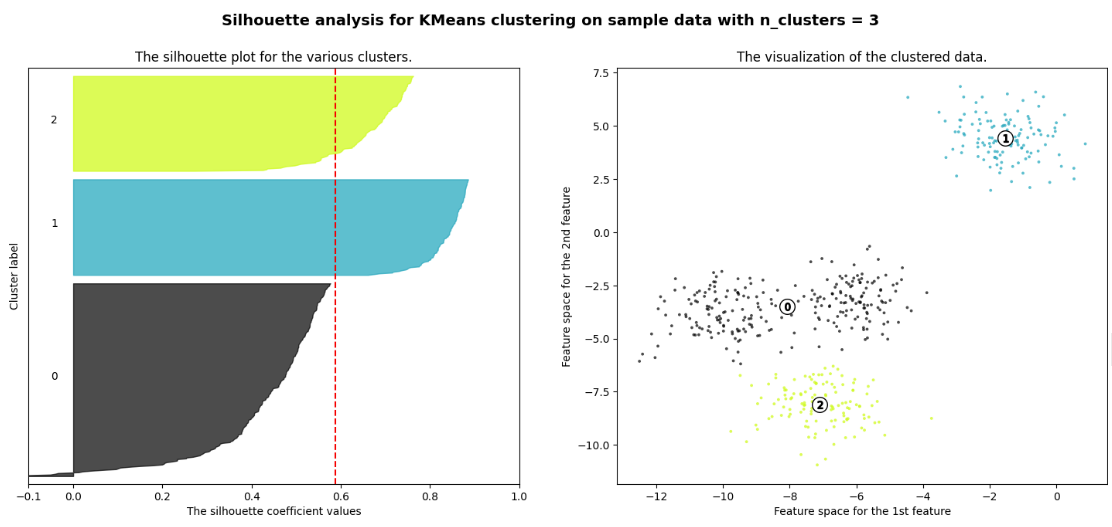

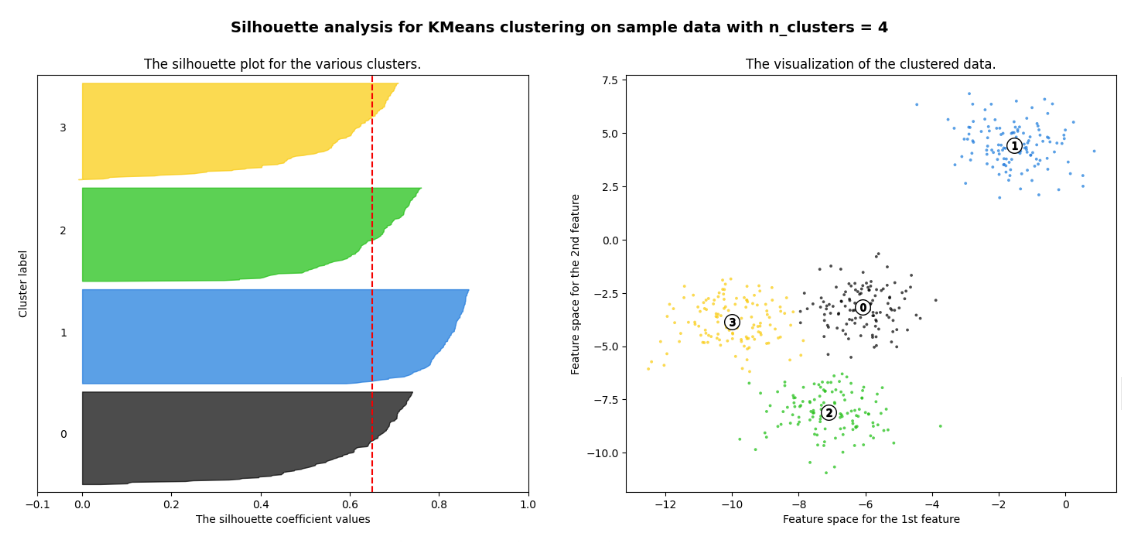

In [24]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

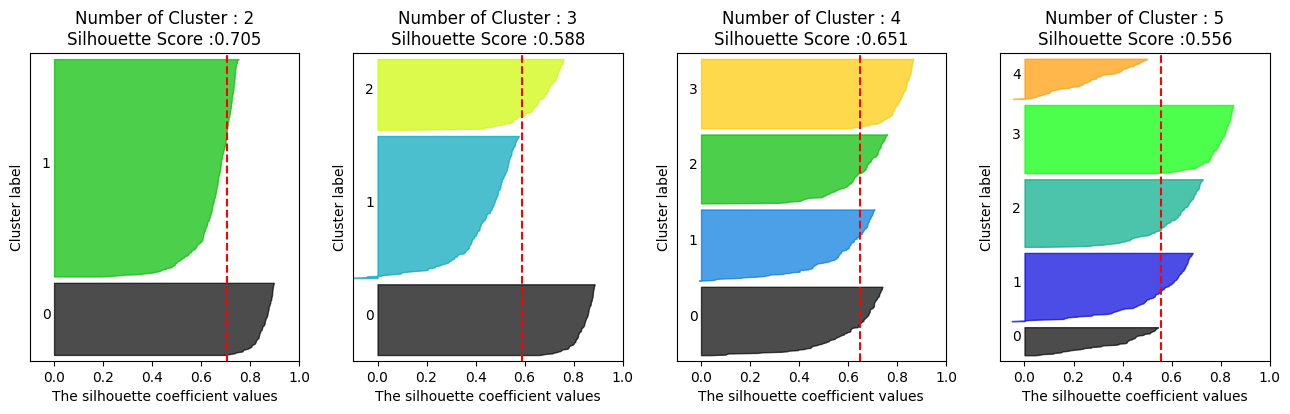

In [25]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

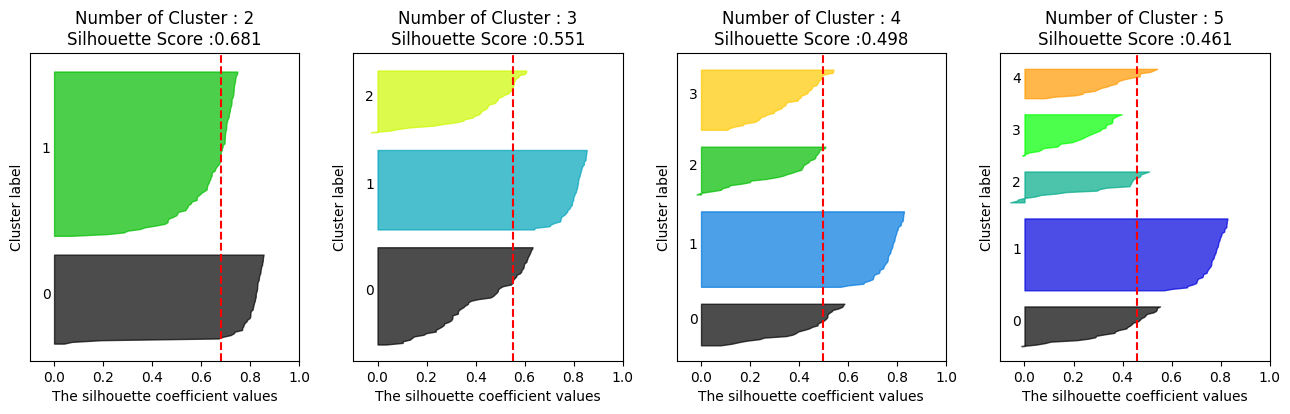

In [ ]:
# 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수를 알아보기

In [ ]:
붓꽃 군집화 결과 정리

#### elbow 방법

In [26]:
inertia = []
for n in range(1, 10):
    km = KMeans(n_clusters=n, random_state=42) # random_state 고정
    km.fit(iris.data)
    print(km.inertia_)
    inertia.append(km.inertia_)

681.3706
152.34795176035792
78.8556658259773
57.350880212954756
46.472230158730156
39.066035353535355
34.30581529581529
30.476222943722945
29.906246659137963


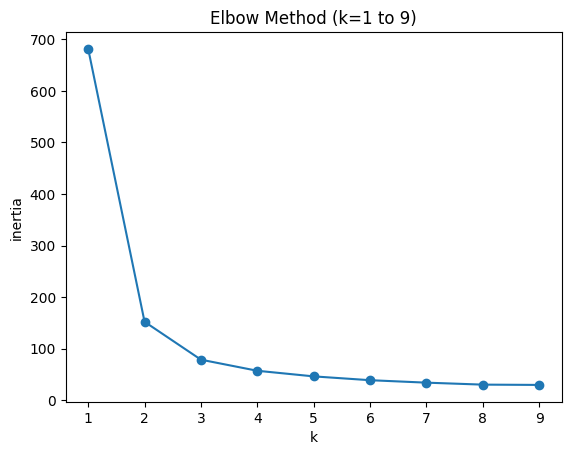

In [ ]:
# 그래프로 그리기 
